In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# import xgboost as xgb

In [51]:
data_path = Path(r"C:\Users\Brand\project_env\Scikit-Learn-Fundamentals\SciKit-Data Science\data\Binary Prediction of Smoker Status using Bio-Signals")
train_data_path = data_path / "train.csv"
test_data_path = data_path / "test.csv"

train_data = pd.read_csv(train_data_path, index_col=0)
test_data = pd.read_csv(test_data_path, index_col=0)

In [4]:
train_data.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   
5    50         170          55       51.0             1.2              1.2   
6    45         160          55       69.0             1.5              1.2   
7    55         155          60       84.5             0.7              0.9   
8    40         165          70       89.0             0.7              1.0   
9    40         155          50       73.0             1.5              1.5   

    hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
id                                                       ...             
0               1               1       135          87  ...   40   75   
1               2               2       146          83  ...   57  126   
2               1               1       118          75  ...   45   93   
3               1               1       131          88  ...   38  102   
4               1               1       121          76  ...   44   93   
5               1               1       146          95  ...   31   99   
6               1               1       150          88  ...   69  122   
7               1               1       137          91  ...   51  198   
8               1               1       130          80  ...   59  150   
9               1               1       105          70  ...   55  122   

    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
id                                                                              
0         16.5              1               1.0   22   25   27              0   
1         16.2              1               1.1   27   23   37              1   
2         17.4              1               0.8   27   31   53              0   
3         15.9              1               1.0   20   27   30              1   
4         15.4              1               0.8   19   13   17              0   
5         15.9              1               0.7   24   42  119              1   
6         13.0              1               0.7   17   12   16              0   
7         14.5              1               0.7   16   15   16              0   
8         15.7              1               0.9   24   21   31              0   
9         13.2              1               0.7   22   16   14              0   

    smoking  
id           
0         1  
1         0  
2         1  
3         0  
4         1  
5         1  
6         0  
7         0  
8         1  
9         0  

[10 rows x 23 columns]

In [5]:
train_data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### Understanding Our Features

1. HDL
    - High Density Lipoprotein
    - Considered as "Good" Proteins
    - Absorbs cholestral from other parts of the body and carries it to the liver, where it is removed from the body
3. LDL
4. Urine Protein
5. Gtp
6. Relaxation
7. Serum Creatinine

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

In [7]:
train_data.describe()

age     height(cm)     weight(kg)      waist(cm)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean       44.306626     165.266929      67.143662      83.001990   
std        11.842286       8.818970      12.586198       8.957937   
min        20.000000     135.000000      30.000000      51.000000   
25%        40.000000     160.000000      60.000000      77.000000   
50%        40.000000     165.000000      65.000000      83.000000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     130.000000     127.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count   159256.000000    159256.000000  159256.000000   159256.000000   
mean         1.005798         1.000989       1.023974        1.023421   
std          0.402113         0.392299       0.152969        0.151238   
min          0.100000         0.100000       1.000000        1.000000   
25%          0.800000         0.800000       1.000000        1.000000   
50%          1.000000         1.000000       1.000000        1.000000   
75%          1.200000         1.200000       1.000000        1.000000   
max          9.900000         9.900000       2.000000        2.000000   

            systolic     relaxation  ...            HDL            LDL  \
count  159256.000000  159256.000000  ...  159256.000000  159256.000000   
mean      122.503648      76.874071  ...      55.852684     114.607682   
std        12.729315       8.994642  ...      13.964141      28.158931   
min        77.000000      44.000000  ...       9.000000       1.000000   
25%       114.000000      70.000000  ...      45.000000      95.000000   
50%       121.000000      78.000000  ...      54.000000     114.000000   
75%       130.000000      82.000000  ...      64.000000     133.000000   
max       213.000000     133.000000  ...     136.000000    1860.000000   

          hemoglobin  Urine protein  serum creatinine            AST  \
count  159256.000000  159256.000000     159256.000000  159256.000000   
mean       14.796965       1.074233          0.892764      25.516853   
std         1.431213       0.347856          0.179346       9.464882   
min         4.900000       1.000000          0.100000       6.000000   
25%        13.800000       1.000000          0.800000      20.000000   
50%        15.000000       1.000000          0.900000      24.000000   
75%        15.800000       1.000000          1.000000      29.000000   
max        21.000000       6.000000          9.900000     778.000000   

                 ALT            Gtp  dental caries        smoking  
count  159256.000000  159256.000000  159256.000000  159256.000000  
mean       26.550296      36.216004       0.197996       0.437365  
std        17.753070      31.204643       0.398490       0.496063  
min         1.000000       2.000000       0.000000       0.000000  
25%        16.000000      18.000000       0.000000       0.000000  
50%        22.000000      27.000000       0.000000       0.000000  
75%        32.000000      44.000000       0.000000       1.000000  
max      2914.000000     999.000000       1.000000       1.000000  

[8 rows x 23 columns]

C:\Users\Brand\AppData\Local\Temp\ipykernel_18056\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
C:\Users\Brand\AppData\Local\Temp\ipykernel_18056\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
C:\Users\Brand\AppData\Local\Temp\ipykernel_18056\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rock

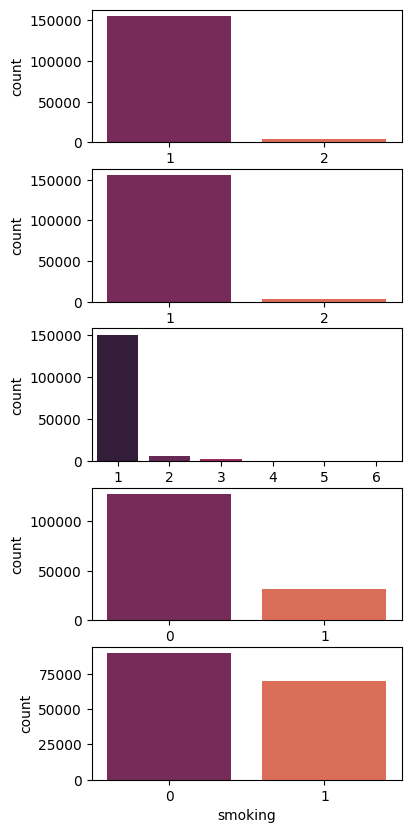

In [8]:
unique_data = [len(train_data[col].unique()) for col in train_data.columns]
unique_series = pd.Series(unique_data, index=train_data.columns)
categorical_data = train_data[unique_series[unique_series < 10].index]

fig, ax = plt.subplots(len(categorical_data.columns), figsize=(4,10))
for i, col in enumerate(categorical_data.columns):
    sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
    # ax[i].set_xlabel(col)
    # ax[i].yaxis.grid(True)

plt.show()

In [9]:
numeric_data = train_data.drop(columns=categorical_data.columns)
numeric_data["smoking"] = train_data["smoking"]
numeric_data.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   
5    50         170          55       51.0             1.2              1.2   
6    45         160          55       69.0             1.5              1.2   
7    55         155          60       84.5             0.7              0.9   
8    40         165          70       89.0             0.7              1.0   
9    40         155          50       73.0             1.5              1.5   

    systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  \
id                                                                              
0        135          87                   94          172           300   40   
1        146          83                  147          194            55   57   
2        118          75                   79          178           197   45   
3        131          88                   91          180           203   38   
4        121          76                   91          155            87   44   
5        146          95                  101          199           343   31   
6        150          88                   84          222           153   69   
7        137          91                  100          282           165   51   
8        130          80                  104          243           163   59   
9        105          70                   64          183            27   55   

    LDL  hemoglobin  serum creatinine  AST  ALT  Gtp  smoking  
id                                                             
0    75        16.5               1.0   22   25   27        1  
1   126        16.2               1.1   27   23   37        0  
2    93        17.4               0.8   27   31   53        1  
3   102        15.9               1.0   20   27   30        0  
4    93        15.4               0.8   19   13   17        1  
5    99        15.9               0.7   24   42  119        1  
6   122        13.0               0.7   17   12   16        0  
7   198        14.5               0.7   16   15   16        0  
8   150        15.7               0.9   24   21   31        1  
9   122        13.2               0.7   22   16   14        0

In [10]:
smokers_data = numeric_data[numeric_data["smoking"] == 1]
smokers_data.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
2    20         170          75       81.0             0.4              0.5   
4    30         165          60       80.5             1.5              1.0   
5    50         170          55       51.0             1.2              1.2   
8    40         165          70       89.0             0.7              1.0   
13   40         170          65       81.0             1.2              1.0   
14   50         175          90      103.0             0.8              0.5   
15   45         170          65       81.8             0.7              0.7   
18   40         175          90       92.0             0.5              1.0   
19   60         165          60       81.0             1.0              1.2   

    systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  \
id                                                                              
0        135          87                   94          172           300   40   
2        118          75                   79          178           197   45   
4        121          76                   91          155            87   44   
5        146          95                  101          199           343   31   
8        130          80                  104          243           163   59   
13       120          76                  106          215            84   54   
14       113          72                   90          220           145   60   
15       111          84                  102          204           180   52   
18       138          88                  124          189           199   44   
19       131          82                  104          201           213   48   

    LDL  hemoglobin  serum creatinine  AST  ALT  Gtp  smoking  
id                                                             
0    75        16.5               1.0   22   25   27        1  
2    93        17.4               0.8   27   31   53        1  
4    93        15.4               0.8   19   13   17        1  
5    99        15.9               0.7   24   42  119        1  
8   150        15.7               0.9   24   21   31        1  
13  145        15.9               0.9   23   18   36        1  
14  131        16.6               1.3   27   24   26        1  
15  117        18.0               0.9   18   20   33        1  
18  106        16.4               1.1   40   53   44        1  
19  110        15.4               1.3   22   26   53        1

In [11]:
non_smokers_data = numeric_data[~(numeric_data["smoking"] == 1)]
non_smokers_data.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
1    70         165          65       89.0             0.6              0.7   
3    35         180          95      105.0             1.5              1.2   
6    45         160          55       69.0             1.5              1.2   
7    55         155          60       84.5             0.7              0.9   
9    40         155          50       73.0             1.5              1.5   
10   40         155          50       68.0             0.8              0.6   
11   50         160          45       64.0             1.2              1.5   
12   40         155          55       80.0             0.8              0.8   
16   40         160          65       78.0             1.2              1.0   
17   45         175          80       92.0             0.6              0.3   

    systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL  \
id                                                                              
1        146          83                  147          194            55   57   
3        131          88                   91          180           203   38   
6        150          88                   84          222           153   69   
7        137          91                  100          282           165   51   
9        105          70                   64          183            27   55   
10       107          60                   71          165            76   48   
11       105          73                   85          217            50   81   
12        95          65                   84          163            94   89   
16       130          81                  102          222            51   71   
17       155          94                  114          208           182   56   

    LDL  hemoglobin  serum creatinine  AST  ALT  Gtp  smoking  
id                                                             
1   126        16.2               1.1   27   23   37        0  
3   102        15.9               1.0   20   27   30        0  
6   122        13.0               0.7   17   12   16        0  
7   198        14.5               0.7   16   15   16        0  
9   122        13.2               0.7   22   16   14        0  
10  101        12.9               0.7   17   11    8        0  
11  126        13.6               0.8   25   17   15        0  
12   56        12.6               0.7   21   15    9        0  
16  141         8.6               0.8   16   12   11        0  
17  115        14.4               1.2   22   16   22        0

In [12]:
def box_plot(smoker_data, non_smoker_data, colors=["lightgreen", "pink"]):
    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=(10, 40))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
        j = i % cols
        
        ax[i % rows, j].set_title(col)
        ax[i % rows, j].yaxis.grid(True)
        
        data = [smoker_data[col], non_smoker_data[col]]
        boxplot = ax[i % rows, j].boxplot(data, labels=[f"smoker {col}", f"nonsmoker {col}"], patch_artist=True, notch=True)
            
        for patch, color in zip(boxplot["boxes"], colors):
            patch.set_facecolor(color)
            
    plt.show()

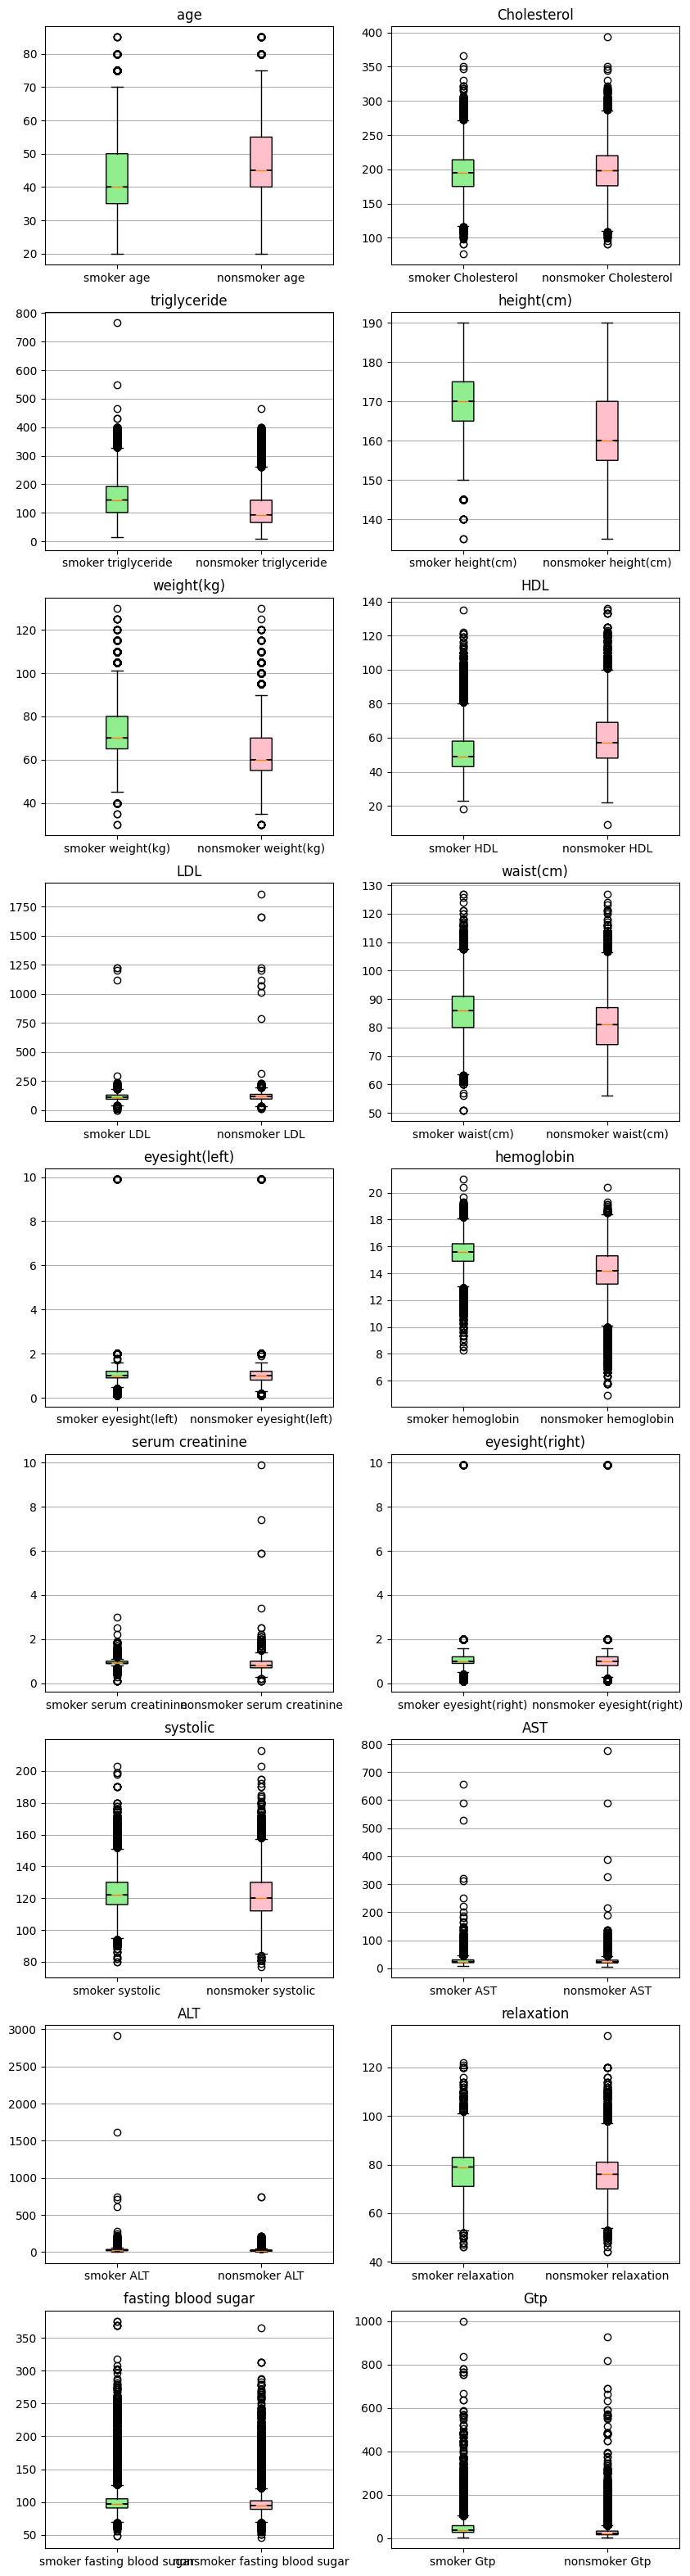

In [13]:
box_plot(smokers_data, non_smokers_data)

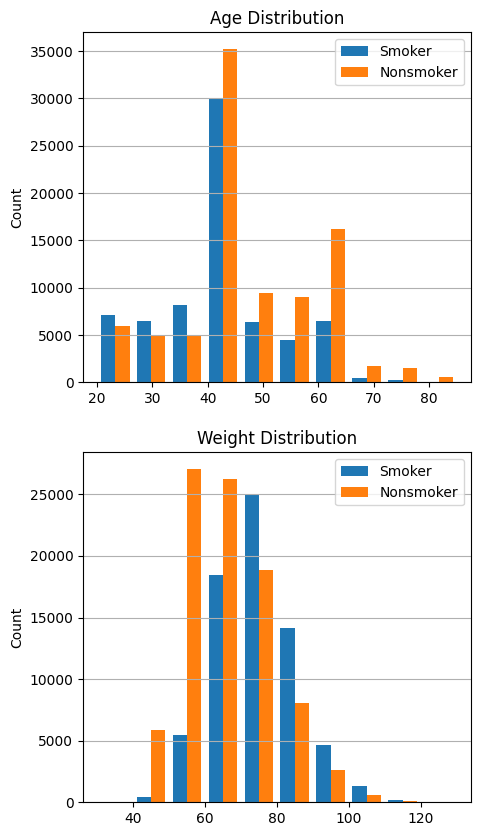

In [14]:
fig,(ax1, ax2) = plt.subplots(2, figsize=(5,10))
ax1.set_title("Age Distribution")
labels = ["Smoker", "Nonsmoker"] 
ax1.hist([smokers_data.age, non_smokers_data.age], label=labels)
ax1.set_ylabel("Count")
ax1.yaxis.grid(True)
ax1.legend()

ax2.set_title("Weight Distribution")
ax2.set_ylabel("Count")
ax2.yaxis.grid(True)
ax2.hist([smokers_data["weight(kg)"], non_smokers_data["weight(kg)"]], label=labels)
ax2.legend()
plt.show()

In [15]:
# fig, ax = plt.subplots(figsize=(15,6))
# smoker_age = sns.kdeplot(ax=ax, data=smokers_data.age, label="smoker_age")
# non_smoker_age = sns.kdeplot(ax=ax, data=non_smokers_data.age, label="non_smoker_age")
# plt.legend()

def plot_distribution_curves(smoker_data, non_smoker_data):

    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=(15, 45))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
        
        j = i % cols
        
        ax[i % rows, j].set_title(f"{col.capitalize()} Distribution Curve")
        ax[i % rows, j].set_ylabel("Count")
        ax[i % rows, j].yaxis.grid(True)
        
        smoker_age = sns.kdeplot(ax=ax[i % rows, j], data=smokers_data[col], label=f"smoker {col}")
        non_smoker_age = sns.kdeplot(ax=ax[i % rows, j], data=non_smokers_data[col], label=f"nonsmoker {col}")
        ax[i % rows, j].legend()
            
            
    plt.show()

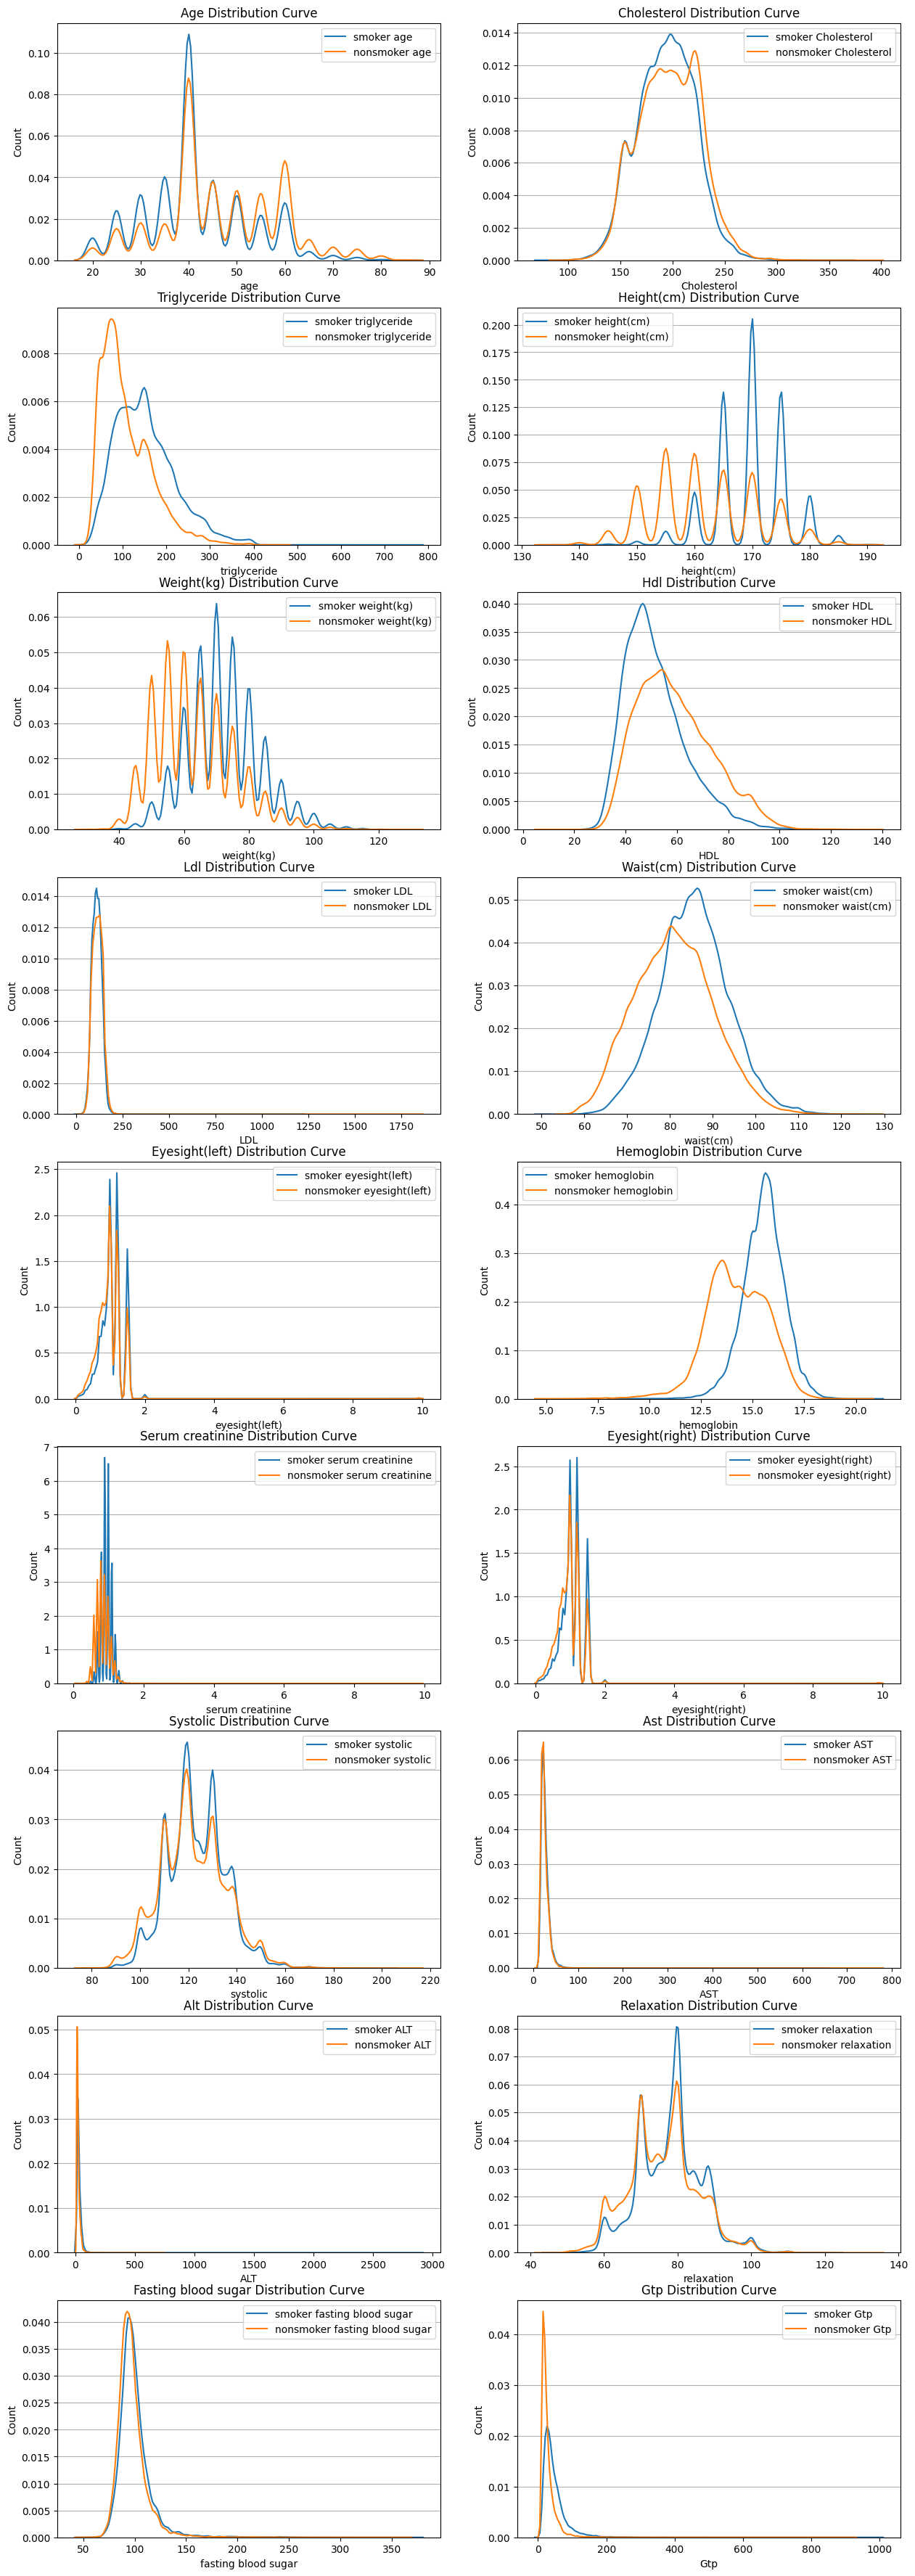

In [16]:
plot_distribution_curves(smokers_data, non_smokers_data)

In [17]:
def plot_distributions(smoker_data, non_smoker_data):

    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    labels = ["Smoker", "Nonsmoker"]
    fig, ax = plt.subplots(rows, cols, figsize=(10, 40))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
            
        j = i % cols
        
        ax[i % rows, j].set_title(f"{col} Distribution")
        ax[i % rows, j].set_ylabel("Count")
        ax[i % rows, j].yaxis.grid(True)
        
        data = [smoker_data[col], non_smoker_data[col]]
        ax[i % rows, j].hist(data, label=labels)
        ax[i % rows, j].legend()
            
            
    plt.show()

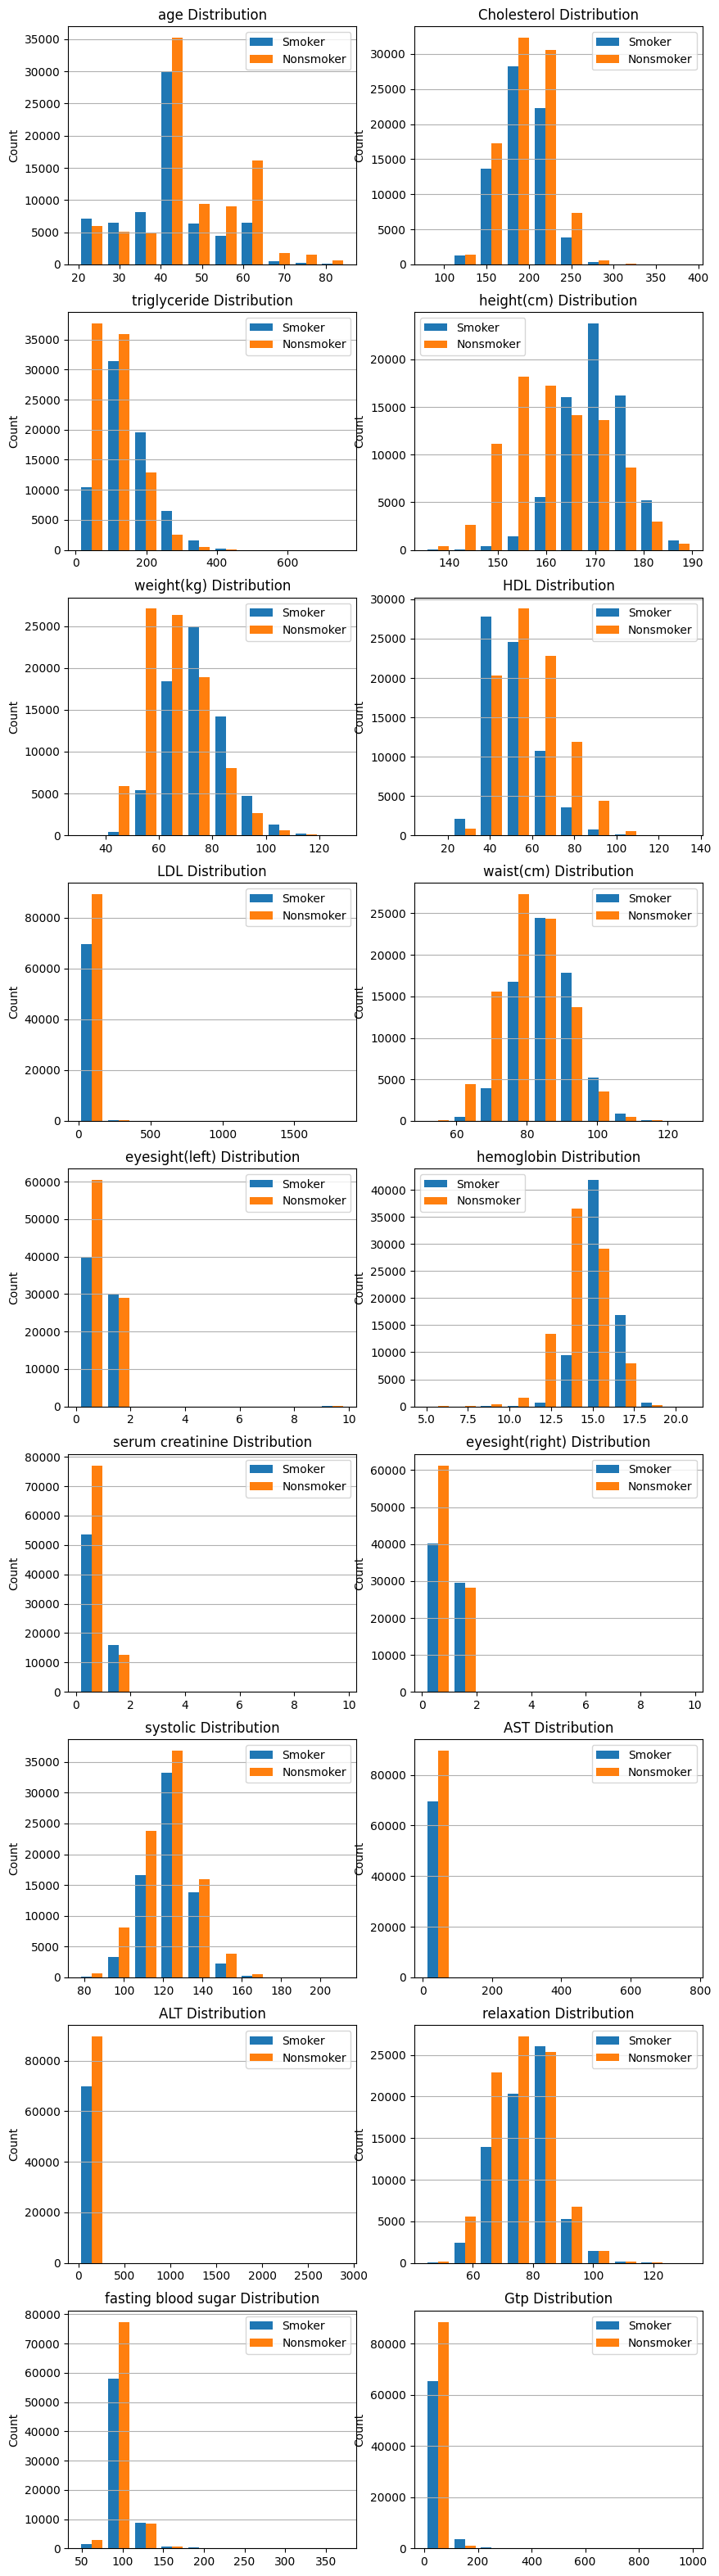

In [18]:
plot_distributions(smokers_data, non_smokers_data)

In [19]:
import scipy
from scipy.stats import ttest_ind

In [20]:
norm_tranformation = StandardScaler().fit_transform(train_data)
norm_data = pd.DataFrame(norm_tranformation, columns=train_data.columns)

norm_data.age.describe()
# When normalizing data, our mean becomes 0 while our standard deviation becomes 1


count    1.592560e+05
mean     2.248666e-17
std      1.000003e+00
min     -2.052535e+00
25%     -3.636662e-01
50%     -3.636662e-01
75%      9.029851e-01
max      3.436288e+00
Name: age, dtype: float64

In [21]:
X = train_data.drop(columns=["smoking"])
y = train_data["smoking"]

In [22]:
X.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   
5    50         170          55       51.0             1.2              1.2   
6    45         160          55       69.0             1.5              1.2   
7    55         155          60       84.5             0.7              0.9   
8    40         165          70       89.0             0.7              1.0   
9    40         155          50       73.0             1.5              1.5   

    hearing(left)  hearing(right)  systolic  relaxation  ...  triglyceride  \
id                                                       ...                 
0               1               1       135          87  ...           300   
1               2               2       146          83  ...            55   
2               1               1       118          75  ...           197   
3               1               1       131          88  ...           203   
4               1               1       121          76  ...            87   
5               1               1       146          95  ...           343   
6               1               1       150          88  ...           153   
7               1               1       137          91  ...           165   
8               1               1       130          80  ...           163   
9               1               1       105          70  ...            27   

    HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  \
id                                                                         
0    40   75        16.5              1               1.0   22   25   27   
1    57  126        16.2              1               1.1   27   23   37   
2    45   93        17.4              1               0.8   27   31   53   
3    38  102        15.9              1               1.0   20   27   30   
4    44   93        15.4              1               0.8   19   13   17   
5    31   99        15.9              1               0.7   24   42  119   
6    69  122        13.0              1               0.7   17   12   16   
7    51  198        14.5              1               0.7   16   15   16   
8    59  150        15.7              1               0.9   24   21   31   
9    55  122        13.2              1               0.7   22   16   14   

    dental caries  
id                 
0               0  
1               1  
2               0  
3               1  
4               0  
5               1  
6               0  
7               0  
8               0  
9               0  

[10 rows x 22 columns]

In [23]:
# used for discrete values
categorical_data_without_target = categorical_data.drop(columns=["smoking"])
m_info_class = pd.Series(mutual_info_classif(categorical_data_without_target,y), index=categorical_data_without_target.columns)
m_info_class.sort_values(ascending=False)

hearing(right)    0.016820
Urine protein     0.015693
hearing(left)     0.014080
dental caries     0.007251
dtype: float64

In [24]:
#used for continous values
numerical_data_without_target = numeric_data.drop(columns=["smoking"])
m_info_reg = pd.Series(mutual_info_regression(numerical_data_without_target ,y), index=numerical_data_without_target.columns)
m_info_reg.sort_values(ascending=False)

hemoglobin             0.134933
height(cm)             0.130956
Gtp                    0.101849
weight(kg)             0.078119
triglyceride           0.076196
serum creatinine       0.057478
waist(cm)              0.042415
HDL                    0.040785
ALT                    0.028782
age                    0.024644
relaxation             0.015504
systolic               0.014100
eyesight(right)        0.010308
AST                    0.007879
LDL                    0.007729
Cholesterol            0.006951
fasting blood sugar    0.006899
eyesight(left)         0.005912
dtype: float64

In [25]:
#R^2 value
correlation_train_data = numeric_data.corr(method="pearson")["smoking"] ** 2
correlation_train_data.sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.203111
height(cm)             0.199908
weight(kg)             0.123727
triglyceride           0.110207
Gtp                    0.093368
serum creatinine       0.074517
HDL                    0.073542
waist(cm)              0.069019
age                    0.042450
ALT                    0.026574
eyesight(right)        0.012052
relaxation             0.011990
eyesight(left)         0.010084
fasting blood sugar    0.009319
LDL                    0.005225
AST                    0.003528
systolic               0.003439
Cholesterol            0.002693
Name: smoking, dtype: float64

<Axes: >

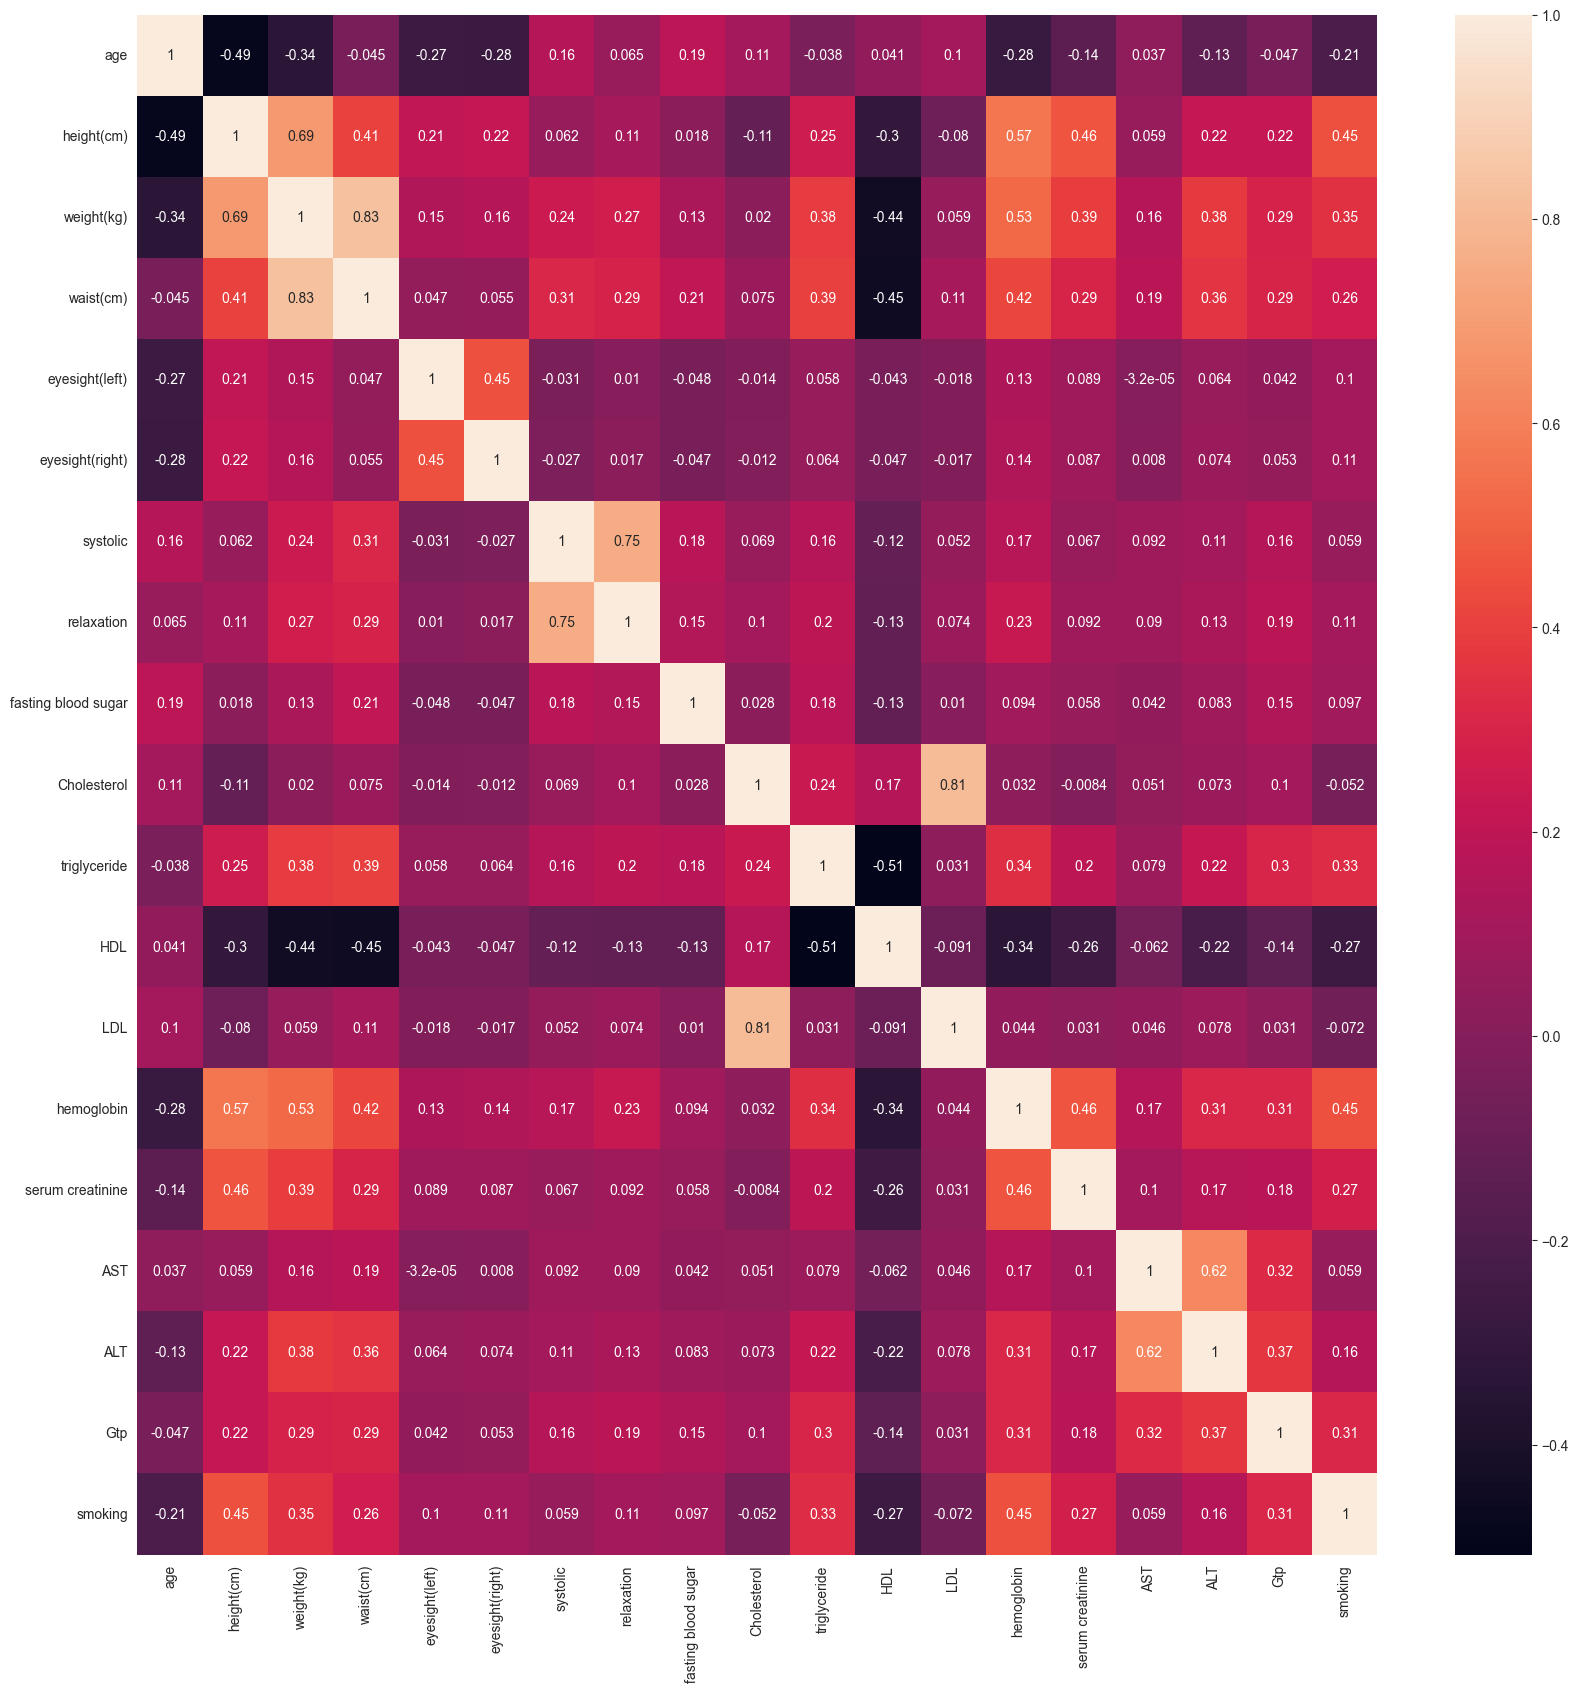

In [26]:
sns.set_style("darkgrid")
# sns.lmplot(numeric_data, x="age", y="height(cm)", hue="smoking", palette="mako")
# sns.scatterplot(numeric_data, x="age", y="height(cm)", hue="smoking", style="smoking", palette="mako")
plt.figure(figsize=(20,20))
sns.heatmap(numeric_data.corr(), annot=True)

In [27]:
len(numeric_data.columns)

19

C:\Users\Brand\project_env\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 2000x2000 with 0 Axes>

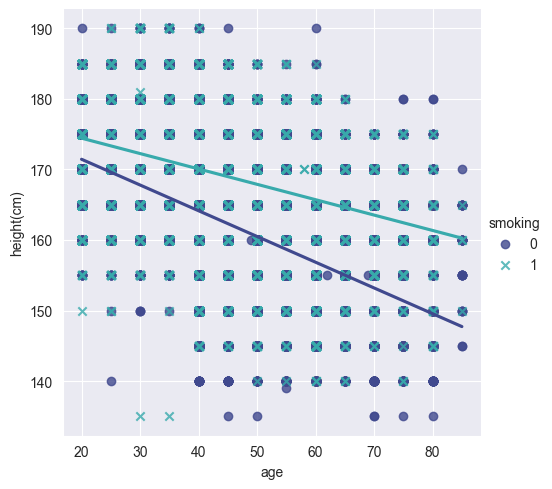

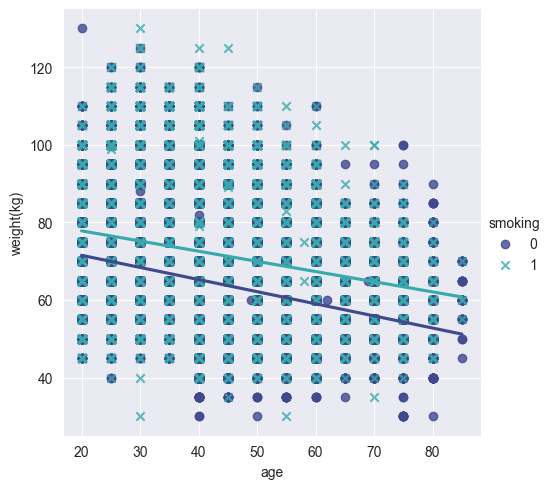

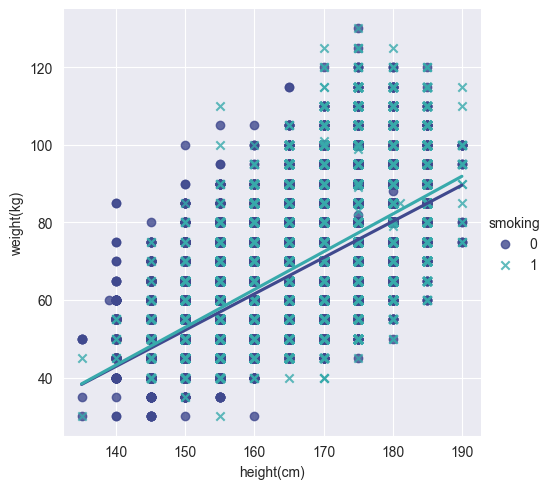

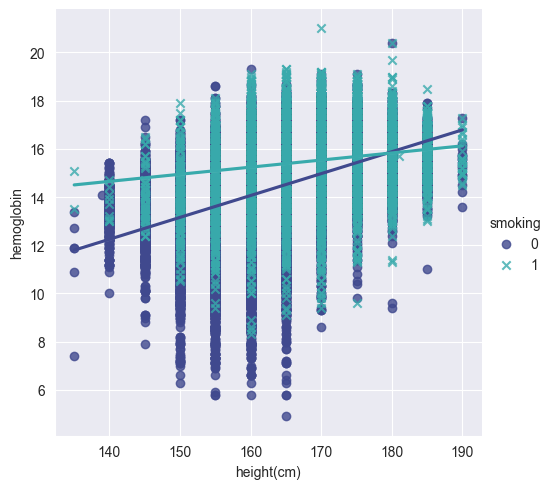

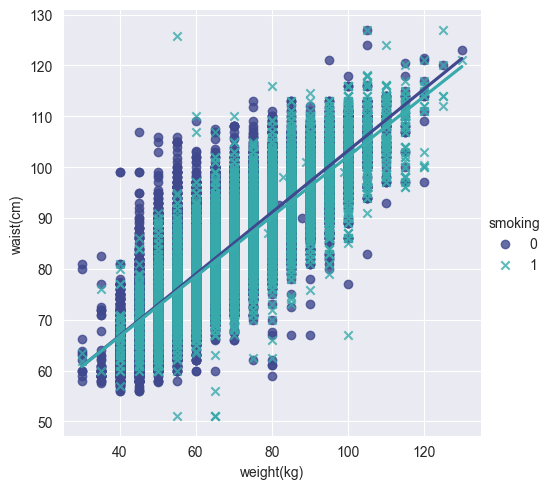

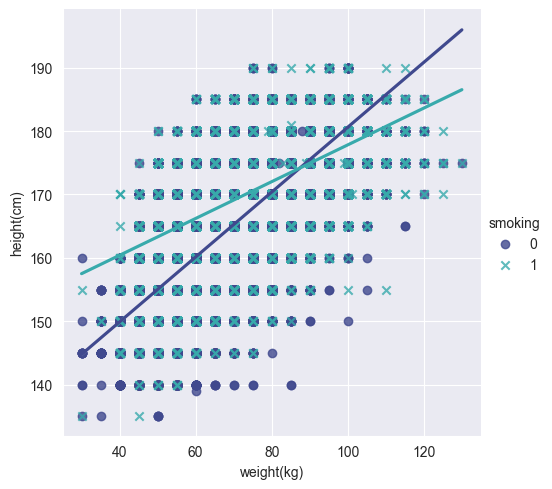

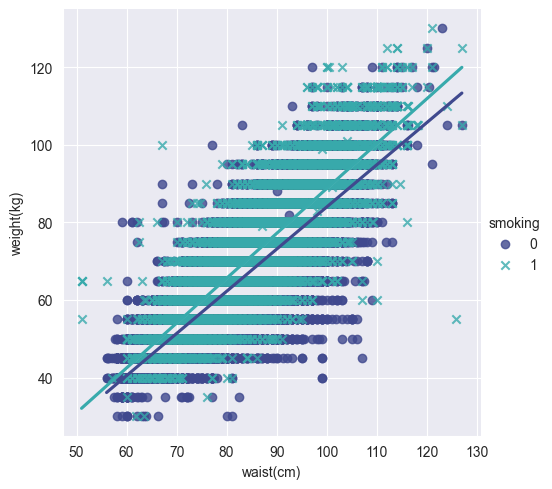

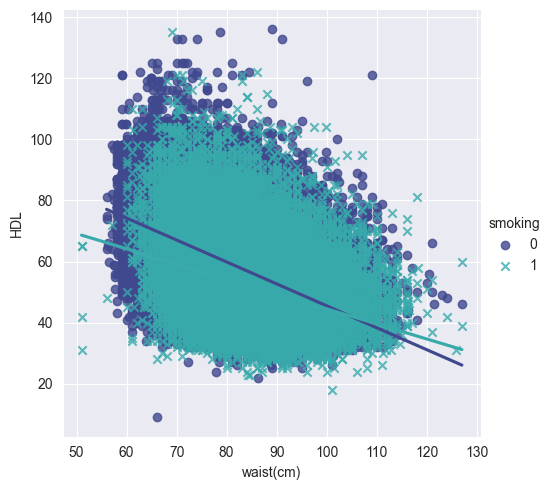

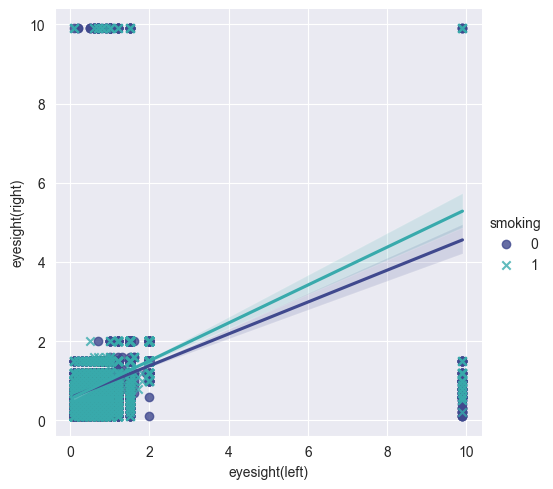

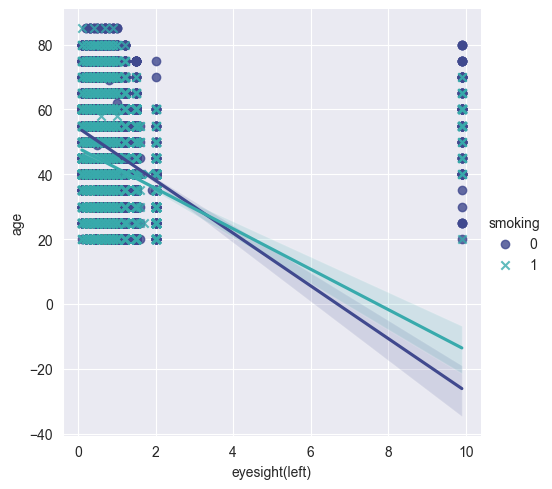

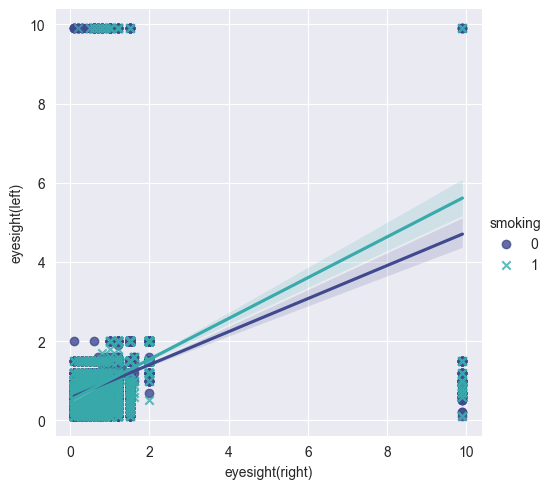

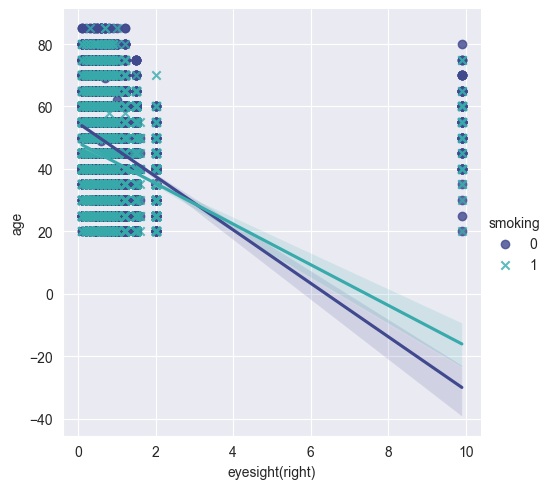

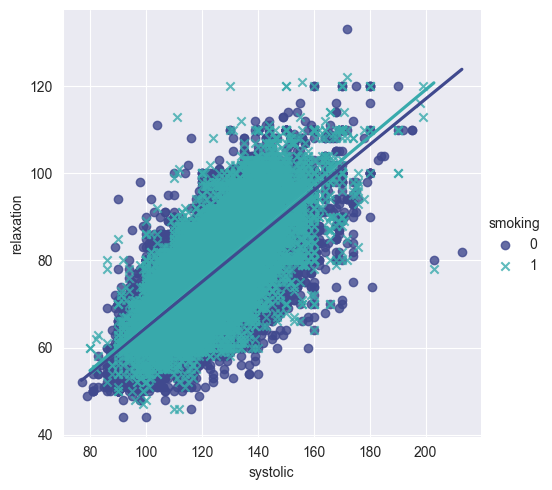

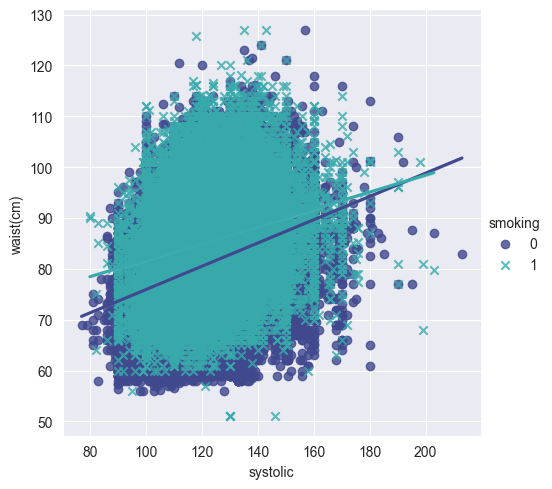

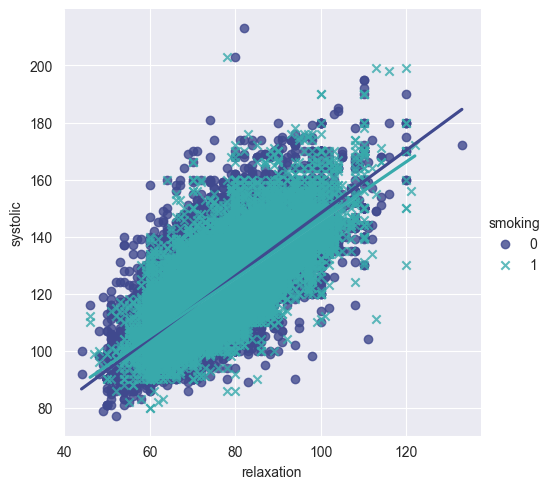

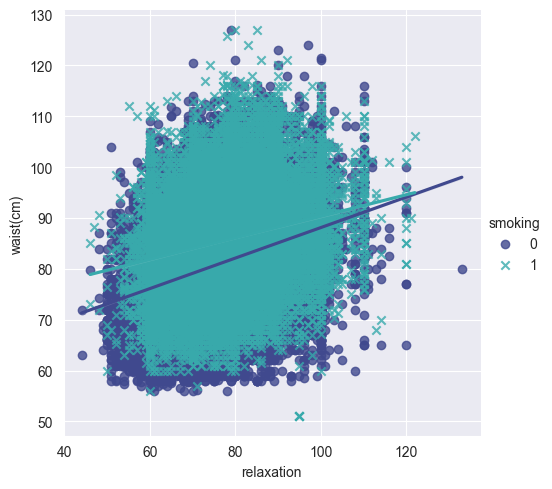

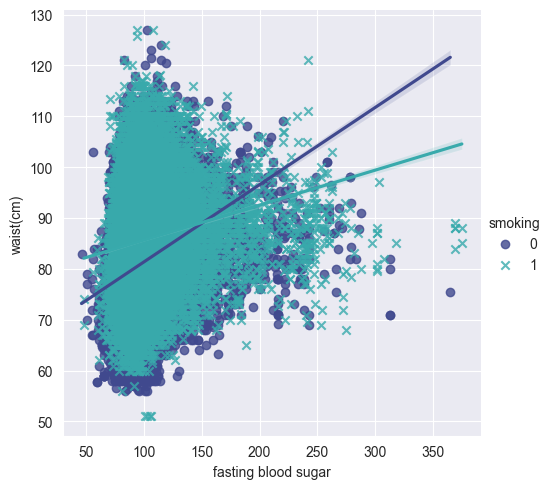

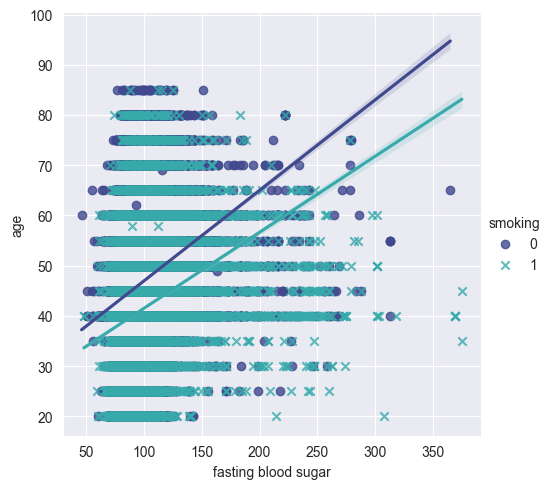

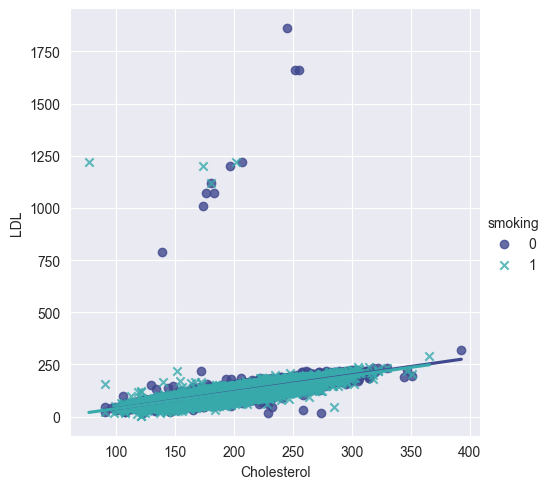

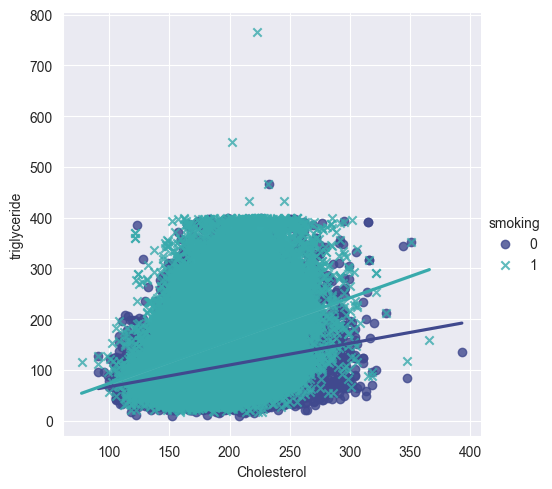

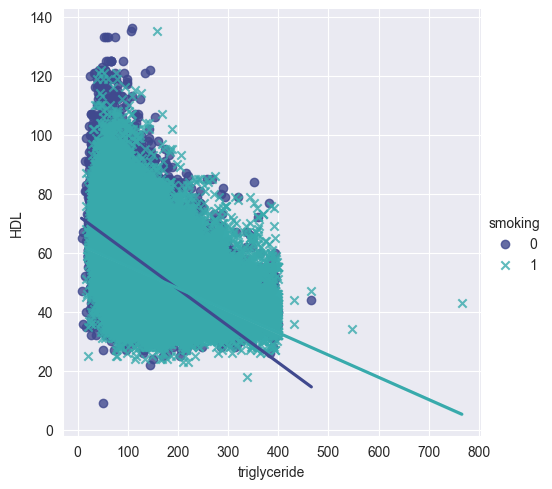

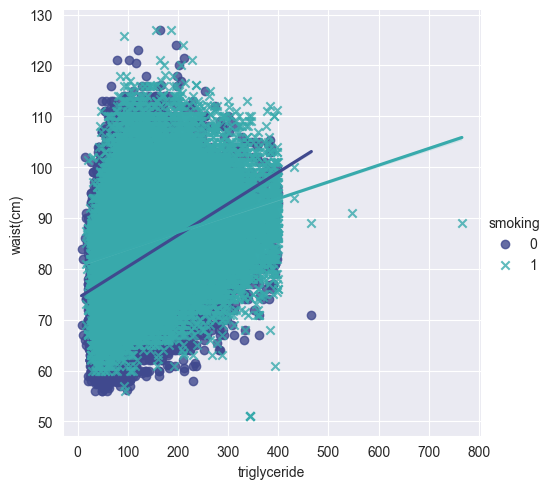

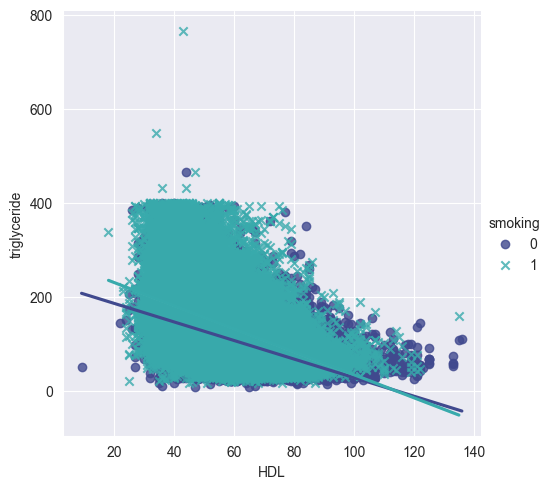

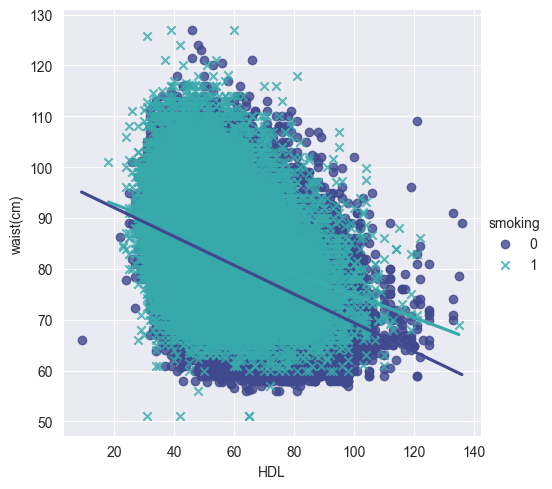

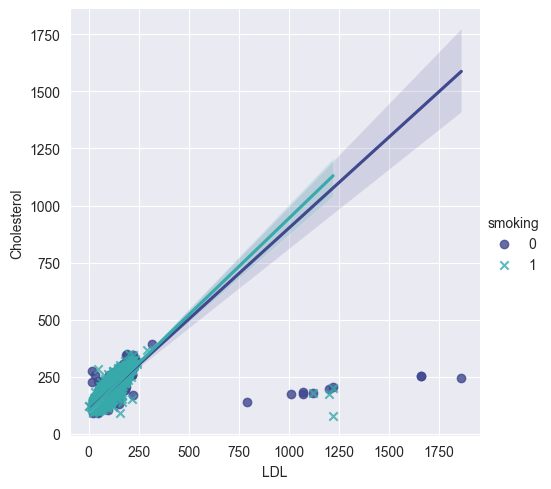

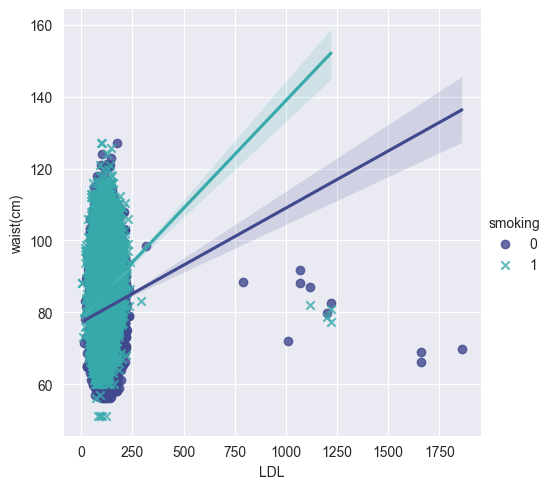

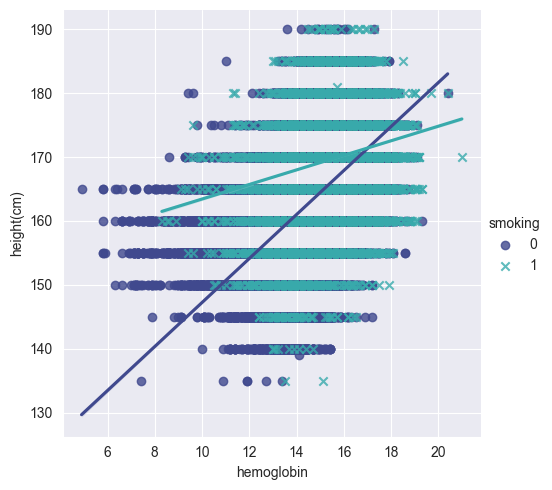

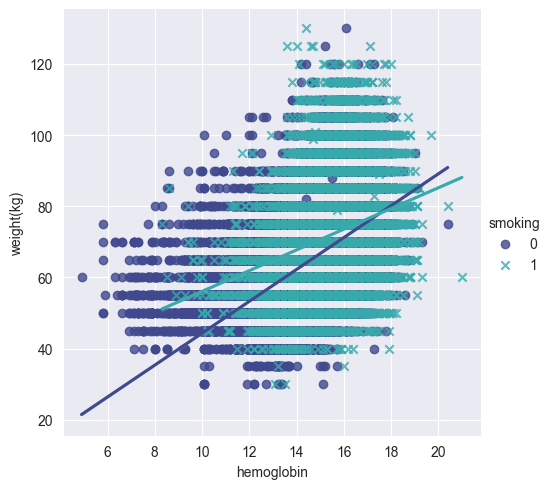

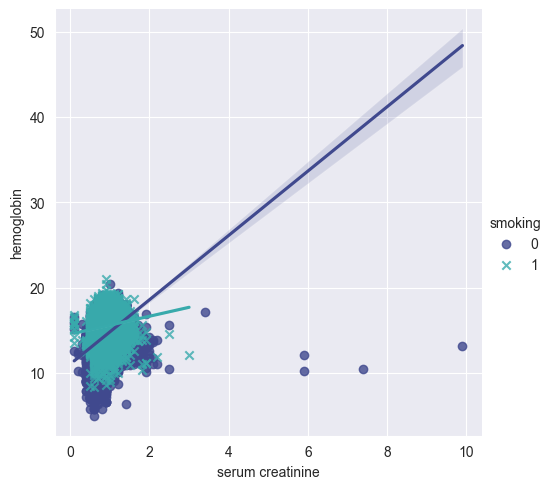

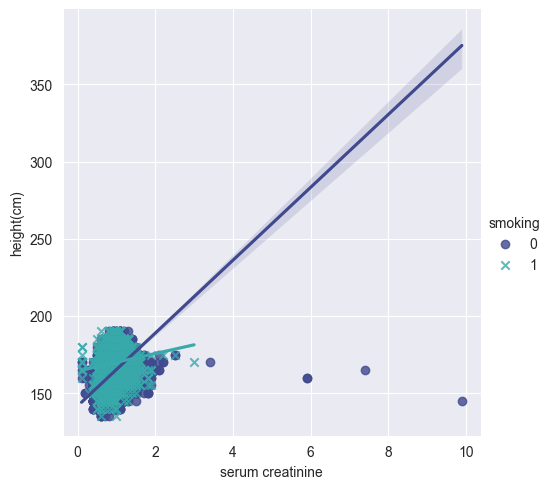

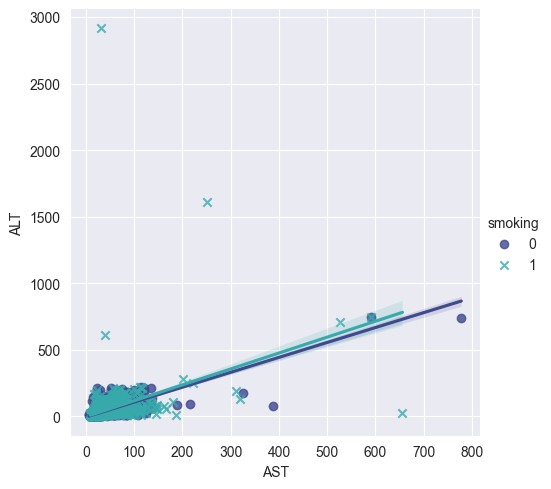

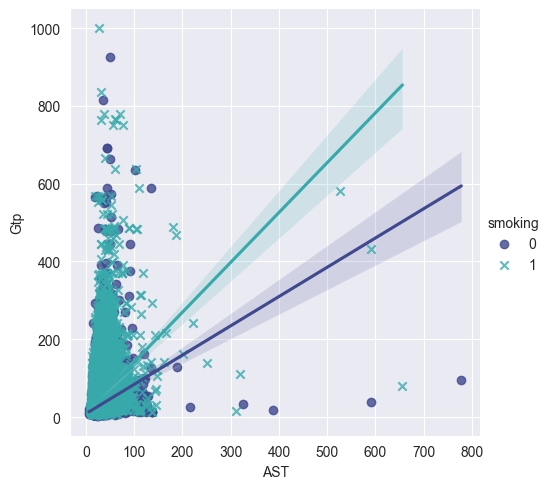

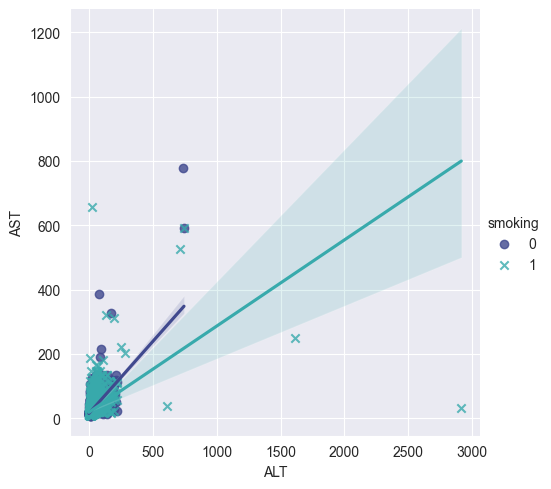

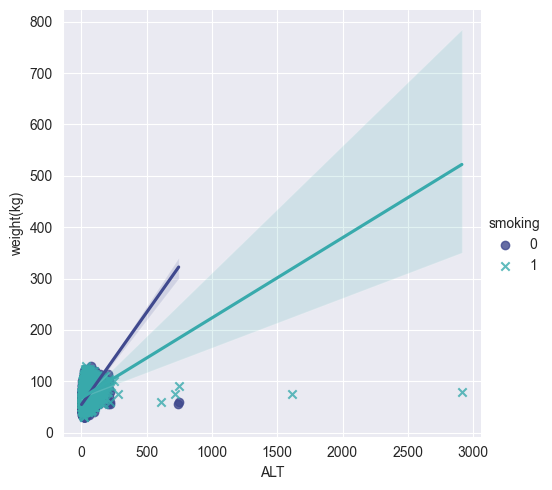

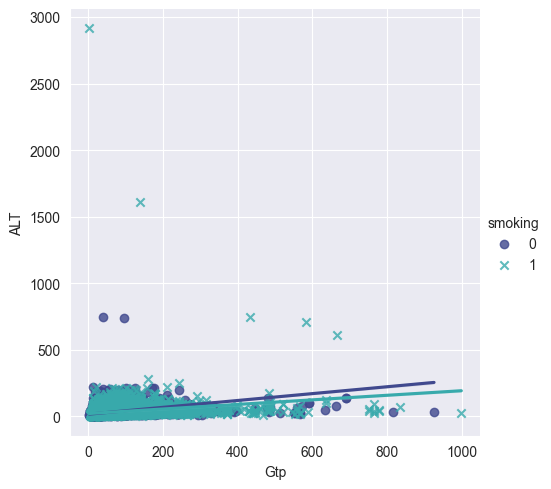

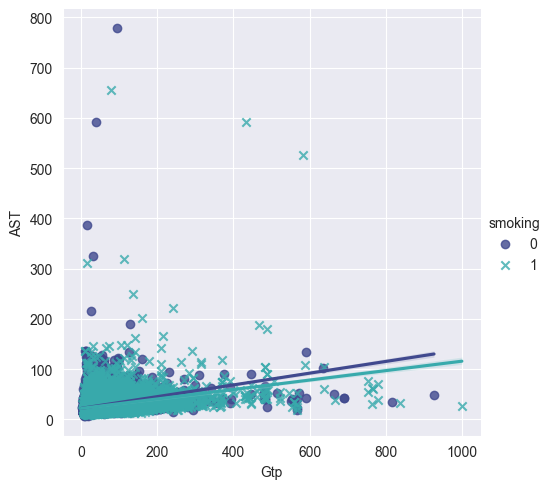

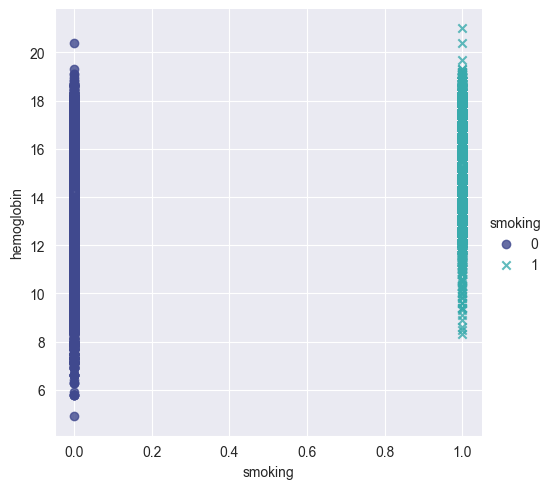

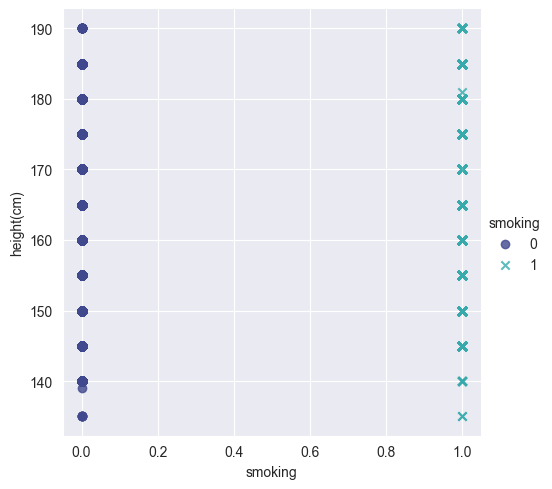

In [28]:
# R^2 values
plt.figure(figsize=(20,20))

for col in numeric_data.columns:
    col_1, col_2 = (numeric_data.corr()[col] ** 2).sort_values(ascending=False).iloc[1:3].index

    sns.lmplot(data=numeric_data, x=col, y=col_1, hue="smoking", markers = ["o", "x"], palette="mako")
    sns.lmplot(data=numeric_data, x=col, y=col_2, hue="smoking", markers = ["o", "x"], palette="mako")

plt.show()

In [31]:
train_data.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   
5    50         170          55       51.0             1.2              1.2   
6    45         160          55       69.0             1.5              1.2   
7    55         155          60       84.5             0.7              0.9   
8    40         165          70       89.0             0.7              1.0   
9    40         155          50       73.0             1.5              1.5   

    hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
id                                                       ...             
0               1               1       135          87  ...   40   75   
1               2               2       146          83  ...   57  126   
2               1               1       118          75  ...   45   93   
3               1               1       131          88  ...   38  102   
4               1               1       121          76  ...   44   93   
5               1               1       146          95  ...   31   99   
6               1               1       150          88  ...   69  122   
7               1               1       137          91  ...   51  198   
8               1               1       130          80  ...   59  150   
9               1               1       105          70  ...   55  122   

    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
id                                                                              
0         16.5              1               1.0   22   25   27              0   
1         16.2              1               1.1   27   23   37              1   
2         17.4              1               0.8   27   31   53              0   
3         15.9              1               1.0   20   27   30              1   
4         15.4              1               0.8   19   13   17              0   
5         15.9              1               0.7   24   42  119              1   
6         13.0              1               0.7   17   12   16              0   
7         14.5              1               0.7   16   15   16              0   
8         15.7              1               0.9   24   21   31              0   
9         13.2              1               0.7   22   16   14              0   

    smoking  
id           
0         1  
1         0  
2         1  
3         0  
4         1  
5         1  
6         0  
7         0  
8         1  
9         0  

[10 rows x 23 columns]

In [56]:
numeric_data.drop(columns=["smoking"], inplace=True)

In [57]:
cardanility = pd.Series([len(categorical_data[col].unique()) for col in categorical_data.columns], index=categorical_data.columns)

threshold = 3
low_cardanility = cardanility[cardanility < threshold]
high_cardanility = cardanility[~(cardanility < threshold)]

low_card_cols = low_cardanility.index
high_card_cols = high_cardanility.index

In [58]:
cat_col_preprocess = ColumnTransformer(
    [("high_cardinality_cat", OneHotEncoder(), high_card_cols),
     ("low_cardinality_cat", OrdinalEncoder(), low_card_cols),
     ("numeric_value", StandardScaler(), numeric_data.columns)],
    remainder="passthrough")

cleaned_train_data = pd.DataFrame(cat_col_preprocess.fit_transform(train_data, y))
# cleaned_test_data = pd.DataFrame(cat_col_preprocess.fit_transform(test_data, y))
cleaned_train_data

0    1    2    3    4    5    6    7    8    9   ...        18  \
0       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ... -0.283930   
1       1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  3.173413   
2       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ... -1.262423   
3       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ... -0.479628   
4       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ... -0.479628   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
159251  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -2.240916   
159252  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.610094   
159253  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.936258   
159254  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.542591   
159255  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.001491   

              19        20        21        22        23        24        25  \
0      -0.837985  2.604429 -1.135246 -1.406581  1.189928  0.597927 -0.371570   
1      -0.063252 -1.097105  0.082162  0.404573  0.980315  1.155511  0.156700   
2      -0.626695  1.048274 -0.777185 -0.767350  1.818767 -0.517239  0.156700   
3      -0.556264  1.138923 -1.278470 -0.447734  0.770702  0.597927 -0.582878   
4      -1.436643 -0.613639 -0.848797 -0.767350  0.421347 -0.517239 -0.688532   
...          ...       ...       ...       ...       ...       ...       ...   
159251  1.486214 -1.217971  1.156345  1.576497 -0.207493 -0.517239 -0.054608   
159252  0.605836  1.123815  0.583447 -0.234657 -0.207493 -1.632406 -0.477224   
159253 -0.239328 -1.248188  2.230528 -0.767350 -2.722849 -1.632406 -1.111148   
159254 -1.084492  0.307967 -0.061063 -1.229016 -0.277364  1.155511 -0.371570   
159255 -0.344973 -0.613639  2.230528 -1.193504 -0.556848 -0.517239 -0.477224   

              26        27  
0      -0.087326 -0.295342  
1      -0.199983  0.025124  
2       0.250645  0.537870  
3       0.025331 -0.199202  
4      -0.763267 -0.615808  
...          ...       ...  
159251 -0.030997 -0.743994  
159252 -0.368968 -0.583761  
159253 -0.988581 -0.776041  
159254 -0.537954  0.025124  
159255 -0.594282 -0.615808  

[159256 rows x 28 columns]

Text(0.5, 1.0, 'Components vs. Data Representation')

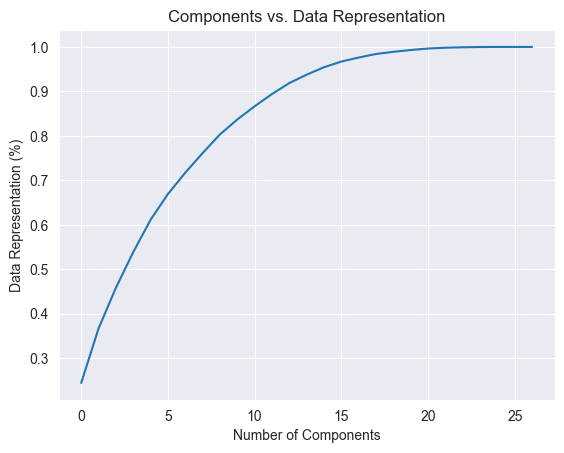

In [59]:
pca = PCA(n_components=27)
pca.fit(cleaned_train_data)
pca.transform(cleaned_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Data Representation (%)")
plt.title("Components vs. Data Representation")

In [76]:
X = cleaned_train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
def train_models(X_train, X_test, y_train, y_test):
    models = {"log_reg": LogisticRegression(),
             "random_forest": RandomForestClassifier(),
             "extra_tree":ExtraTreesClassifier(),
             "adaboost": AdaBoostClassifier()}

    
    scores = {"ROC_AUC_SCORE": 0,
             "F1_SCORE": 0}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        model_f1_score = f1_score(y_pred, y_test)
        model_roc_auc_score = roc_auc_score(y_pred, y_test)

        print(f"{name}\n---------\nF1_score:  {model_f1_score}\nROC_AUC_score:  {model_roc_auc_score}\n")
        print(f"{confusion_matrix(y_pred, y_test)}\n")
        
        scores["ROC_AUC_SCORE"] = max(scores["ROC_AUC_SCORE"], model_roc_auc_score)
        scores["F1_SCORE"] = max(scores["F1_SCORE"], model_f1_score)

    return scores

In [84]:
train_models(X_train, X_test, y_train, y_test)

log_reg
---------
F1_score:  1.0
ROC_AUC_score:  1.0

[[17783     0]
 [    0 14069]]

random_forest
---------
F1_score:  1.0
ROC_AUC_score:  1.0

[[17783     0]
 [    0 14069]]

extra_tree
---------
F1_score:  1.0
ROC_AUC_score:  1.0

[[17783     0]
 [    0 14069]]



C:\Users\Brand\project_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


adaboost
---------
F1_score:  1.0
ROC_AUC_score:  1.0

[[17783     0]
 [    0 14069]]



{'ROC_AUC_SCORE': 1.0, 'F1_SCORE': 0}